## Modelo SEIR

    Rodrigo Fritz

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd

# For the progress bar:
import time
from tqdm.notebook import tqdm

La simulación con autómatas celulares, i.e. el modelo basado en agentes, genera una imagen para cada paso de la evolución, cada una de las cuales será guardada en un .gif

Los tipos de población para el modelo basado en agentes se definen a continuación:

In [2]:
np.random.choice(2, 5, replace=True)

array([1, 1, 0, 1, 1])

In [3]:
np.ones(5).astype(int)

array([1, 1, 1, 1, 1])

In [4]:
np.ones(5,dtype=int)

array([1, 1, 1, 1, 1])

In [2]:
np.random.choice(2, 1, replace=True)

array([1, 1, 0, 1, 1])

In [ ]:
#Los expuestos conforman el estado intermedio entre susceptibles e infectados

def exposed(df, σ=1/4): #df = data frame, σ = periodo de incubación de 4 días para covid
    susc = df[df["state"] < 2] #Susceptibles: estados 0 y 1 -> susc.index
    infs = df[df["state"]== 2] #Infectados estado 2

#     exps = np.random.choice(susc.index, 5*len(infs), replace=True)
#     exps = np.random.choice(susc.index, len(infs), replace=True) #Mútiplos de infs para avanzar más rápido

#     for i in exps:
#     for i in range(len(df)):
#         p = np.random.uniform(0,1) #random float between 0 and 1
#         if(df.iloc[i]["state"]==0 and p<=σ): #Los Susceptibles (estado 0) se transforman en 
#             df.iloc[i]["state"]=1            #Expuestos (estado 1) con tasa de transmisión σ

    for i in range(len(df)-1):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==2 and df.iloc[i+1]["state"]==0 and df.iloc[i-1]["state"]==0 and p<=σ):
            #Los infectados (estado 2) contagian a los 
            df.iloc[i+1]["state"]=1 #expuestos (estado 1) con tasa de infección σ
            df.iloc[i-1]["state"]=1
    return exps

In [60]:
np.unique(exps)

array([   8,   78,  177,  218,  267,  281,  284,  296,  351,  390,  391,
        408,  464,  476,  588,  653,  690,  725,  889,  896,  929,  940,
        943,  997, 1028, 1058, 1109, 1125, 1139, 1148, 1167, 1280, 1389,
       1423, 1459, 1469, 1569, 1588, 1627, 1645], dtype=int64)

In [61]:
exps

array([   8,  940,  296,  997,  267,  390,   78, 1423,  464, 1058,  889,
        943, 1028, 1167, 1280, 1588,  896, 1109,  177,  929,  391,  588,
       1139,  177,  218,  281,  408,  476, 1125, 1569, 1645, 1148,  653,
        351,  690, 1469,  725, 1459, 1627, 1389,  284], dtype=int64)

In [17]:
# Not playing now
def infected(df, lst_cont, β=0.119): # β = tasa de transmisión = R_0·γ
#     no_rep = np.unique(lst_cont)
#     for i in no_rep:
    for i in range(len(df)):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==1 and p<=β): #Los Susceptibles (estado 1) se transforman en 
            df.iloc[i]["state"]=2            #Infectados (estado 2) con tasa de transmisión beta

In [4]:
def removed(df, γ=1/21): #γ = periodo de recuperación de 21 días para covid
    for i in range(len(df)):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==2 and p<=γ): #Los infectados se transforman en recuperados después de 1/gamma días
            df.iloc[i]["state"]=3

In [5]:
from PIL import Image
import matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay

In [6]:
save_folder = 'coral'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

### Coral

In [99]:
γ = 1/21  #tasa de recuperación (21 días)
β = 2.5*γ #tasa de transmisión (R_0·γ)
σ = 1/4   #tasa de incubación (4 días)
Tmax = 61 #121
side = 41 #Lado del cuadrado
nAgents = side**2 #El número de agentes es el número de pixeles, que es el lado al cuadrado
state = np.zeros(nAgents,dtype=int)
data = {"state": state}
agents = pd.DataFrame(data)

#Iniciar los infectados en el centro
i0 = int(side**2/2-side) #np.random.randint(0,400)
s0 = 2
agents.iloc[i0]["state"] = s0
agents.iloc[i0+2*side+10]["state"] = s0
# agents.iloc[i0+1]["state"] = s0
# agents.iloc[i0-1]["state"] = s0
# agents.iloc[i0-side]["state"] = s0
# agents.iloc[i0+side]["state"] = s0

S = [len(agents[agents["state"]==0])]
E = [0]
I = [len(agents[agents["state"]==2])]
R = [0]
print('Hay', nAgents, 'agentes (pixeles),')
print('empezamos con', I[0], 'infectados')
print('por lo que quedan', S[0], 'susceptibles')

#Autómatas Celulares
cmap = colors.ListedColormap(['blue','green','orange','red']) #Para tener el mismo código de color que el default de pyplot
bounds=[0,1,2,3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)

tiempo = time.time() # To start recording time of operation
for t in tqdm(range(Tmax)): #tqdm is the progress bar
    agents.iloc[i0]["state"] = s0
    agents.iloc[i0+1+t]["state"] = s0
    agents.iloc[i0-1-t]["state"] = s0
    
    if i0+t*side <= side**2-side:
        agents.iloc[i0-t*side]["state"] = s0
        agents.iloc[i0+t*side]["state"] = s0
        agents.iloc[i0-t*side-t]["state"] = s0
        agents.iloc[i0+t*side+t]["state"] = s0
        agents.iloc[i0-t*side+t]["state"] = s0
        agents.iloc[i0+t*side-t]["state"] = s0
    exps = exposed(agents,σ)
#     infected(agents,exps,β)
    removed(agents,γ)
    sts = np.array(agents["state"])
    show_sts = np.reshape(sts,(side,side))
    img = plt.imshow(show_sts,cmap=cmap,norm=norm)
    plt.colorbar(boundaries=bounds, ticks=[0,1,2,3])
    plt.title("t = "+str(t))
    plt.xticks(np.arange(0, side, 5))
    plt.yticks(np.arange(0, side, 5))
    name = "./coral/img"+str(t).zfill(3)+".png"
    plt.savefig(name)
    plt.clf()
    S.append(len(agents[agents["state"]==0]))
    E.append(len(agents[agents["state"]==1]))
    I.append(len(agents[agents["state"]==2]))
    R.append(len(agents[agents["state"]==3]))
    
print("Operation took %g seconds" % (time.time() - tiempo))

Hay 1681 agentes (pixeles),
empezamos con 2 infectados
por lo que quedan 1679 susceptibles


  0%|          | 0/61 [00:00<?, ?it/s]

Operation took 108.308 seconds


<Figure size 432x288 with 0 Axes>

In [30]:
exposed(agents,1/4)

array([264, 350, 205, 382, 341, 301, 390, 325, 112,  43,  99, 350, 351,
       338, 263,  16,  29,  42, 196, 144, 277, 424, 421,  53, 146, 111,
       317, 218, 366, 131, 262,  43, 133,  42,  50,  15, 269, 123, 433,
        99, 153,  46, 273, 356,  31, 338,  13, 108,   9, 378, 286, 394,
       388, 284, 124, 438, 374, 295, 394, 280,  15, 153, 398, 361, 112,
       307, 395, 357,  91,  47, 216, 255,  56, 252, 208, 186, 182,  87,
       334,  87,   4, 267, 369,  54, 202, 213,  58, 170, 148, 136, 392,
       228, 398, 374, 112, 284,  45, 347,  48,  77, 104, 217,  98,  16,
       237, 361, 250, 270, 418, 288, 187, 416, 431, 288, 256, 217, 306,
       344, 440, 246, 210, 391, 338, 139, 355, 399, 114,  25], dtype=int64)

In [26]:
agents["state"]==2

0      False
1       True
2      False
3       True
4       True
       ...  
436    False
437    False
438    False
439    False
440    False
Name: state, Length: 441, dtype: bool

In [12]:
agents[agents["state"]==2]

,state
79,2
164,2
207,2
210,2
245,2
312,2
424,2


### Animation
(from Animated Lorenz Attractor)

In [102]:
# create a tuple of display durations, one for each frame
first_last = 700 #show the first and last frames for 100 ms
standard_duration = 100 #show all other frames for 20 ms
durations = tuple([first_last] + [standard_duration]*(Tmax - 2) + [first_last])

In [103]:
# load all the static images into a list
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))[:61]] #Lee todos los archivos en el folder
gif_filepath = 'coral/coral.gif'

In [104]:
# save as an animated gif
gif = images[0]
gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

In [103]:
# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) == len(durations)

True

In [18]:
IPdisplay.Image(url=gif_filepath)

Código de color: azul = susceptible, verde = expuesto, naranja = infectado, rojo = removido

In [85]:
agents.describe() #Al final de la simulación casi todos están en el estado 3: removidos

,state
count,400.00000
mean,2.97250
std,0.16374
min,2.00000
25%,3.00000
50%,3.00000
75%,3.00000
max,3.00000


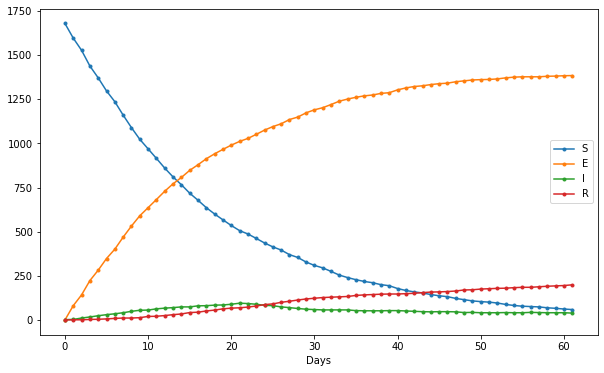

In [45]:
# exps = np.random.choice(susc.index, 2*len(infs), replace=True)
plt.figure(figsize=(10,6))
plt.plot(S, '.-', label="S")
plt.plot(E, '.-', label="E")
plt.plot(I, '.-', label="I")
plt.plot(R, '.-', label="R")
plt.xlabel('Days')
plt.legend()
plt.show()

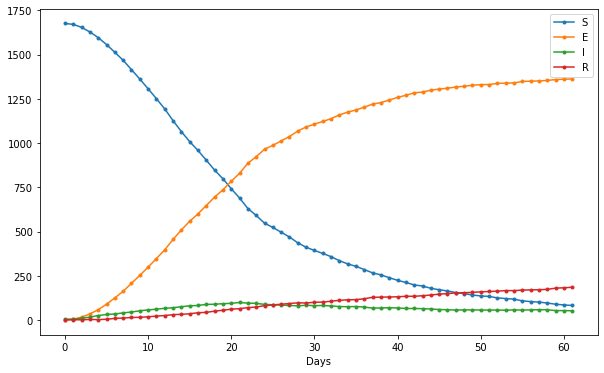

In [32]:
# exps = np.random.choice(susc.index, 2*len(infs), replace=True)
plt.figure(figsize=(10,6))
plt.plot(S, '.-', label="S")
plt.plot(E, '.-', label="E")
plt.plot(I, '.-', label="I")
plt.plot(R, '.-', label="R")
plt.xlabel('Days')
plt.legend()
plt.show()

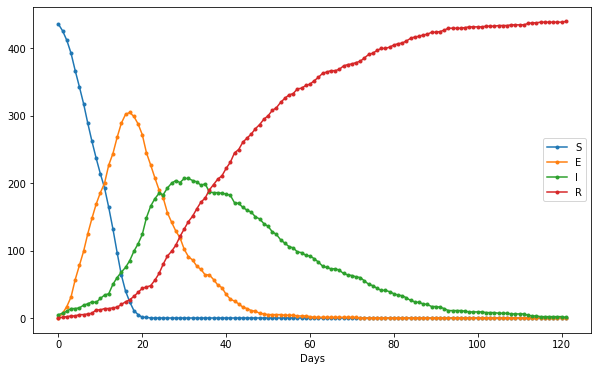

In [278]:
# exps = np.random.choice(susc.index, 2*len(infs), replace=True)
plt.figure(figsize=(10,6))
plt.plot(S, '.-', label="S")
plt.plot(E, '.-', label="E")
plt.plot(I, '.-', label="I")
plt.plot(R, '.-', label="R")
plt.xlabel('Days')
plt.legend()
plt.show()

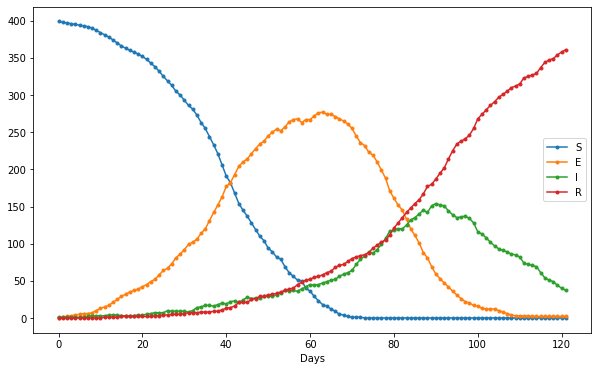

In [121]:
# exps = np.random.choice(susc.index, len(infs), replace=True)
plt.figure(figsize=(10,6))
plt.plot(S, '.-', label="S")
plt.plot(E, '.-', label="E")
plt.plot(I, '.-', label="I")
plt.plot(R, '.-', label="R")
plt.xlabel('Days')
plt.legend()
plt.show()